In [18]:
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
!pip install matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached matplotlib-3.6.3-cp39-cp39-win_amd64.whl (7.2 MB)
  Using cached contourpy-1.0.7-cp39-cp39-win_amd64.whl (160 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached Pillow-9.4.0-cp39-cp39-win_amd64.whl (2.5 MB)
     ---------------------------------------- 14.9/14.9 MB 5.4 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.4-cp39-cp39-win_amd64.whl (55 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


ModuleNotFoundError: No module named 'networkx'

In [25]:
import urllib.request
import requests
import time
from bs4 import BeautifulSoup
import re
# we dont need any other info besides text, so i return soup.text straightaway
def parse_html(url):
    try:
        resp = requests.get(url)
        resp.raise_for_status()
        soup = BeautifulSoup(resp.text, "html.parser")
        return soup.text
    except requests.exceptions.HTTPError as err:
        print(err)

In [26]:
# I have three links, I called them by the names of the books
url_enchanted_april = 'https://www.gutenberg.org/files/16389/16389-h/16389-h.htm'
url_little_woman = 'https://www.gutenberg.org/files/37106/37106-h/37106-h.htm'
url_blue_castle = 'https://www.gutenberg.org/files/67979/67979-h/67979-h.htm'

In [27]:
enchanted_april_data = parse_html(url_enchanted_april)
little_woman_data = parse_html(url_little_woman)
blue_castle_data = parse_html(url_blue_castle)

# Basic pre-processing of data


In [28]:
# removing punctuations
def remove_punctuation(text):
    if(type(text)==float):
        return text
    ans=""  
    for i in text:     
        if i not in string.punctuation:
            ans+=i    
    return ans
# after test, i've found several words that do interfere with the balanced results/ imo!:
# "said", "answer",  but in some cases its good observation
enchanted_april  = remove_punctuation(enchanted_april_data)
little_woman = remove_punctuation(little_woman_data)
blue_castle = remove_punctuation(blue_castle_data)

# I take novel from site where at start often use words like:
# "gutenberg", "ebook", "wwwgutenbergorg", "chapter" - that need to be deleted for more quality

new_stopwords = ["gutenberg", "ebook", "wwwgutenbergorg", "chapter", "project", "h"] # i hope its enough


In [29]:
# generate n-grams
def generate_ngrams(text, num=2):
    # replace all none alphanumeric characters with spaces
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub(' +', ' ', text) # delete double spaces (its annoying)
    text = text.replace("\\r\\n", "")
    text = text.lower()
    words = [word for word in text.split(" ") if word not in set(new_stopwords)]
    # use the zip function to help us generate n-grams
    # concatentate the tokens into ngrams and return
    ngrams = zip(*[words[i:] for i in range(0, num)])
    ngrams_ans = [' '.join(ngram) for ngram in ngrams]
    # also, we can use - list(ngrams(tokens, 5)) function Instead of the last two lines
    return ngrams_ans

In [30]:
def ngrams_count(ngrams_list, ngrams_dict):
    for token in ngrams_list:
        if token not in ngrams_dict:
            ngrams_dict[token] = 1
        else:
            ngrams_dict[token] += 1   
    return ngrams_dict


In [31]:
# enchanted_april ngrams dict 
bigram_enchanted_april_dict = {}
trigram_enchanted_april_dict = {}

# do ngrams split
bigram_enchanted_april = generate_ngrams(enchanted_april, 2)
trigram_enchanted_april = generate_ngrams(enchanted_april, 3)

# ngrams counts
bigram_enchanted_april_counts = ngrams_count(bigram_enchanted_april, bigram_enchanted_april_dict)
trigram_enchanted_april_counts = ngrams_count(trigram_enchanted_april, trigram_enchanted_april_dict)

# sort dict
sorted_bigram_enchanted_april_counts = sorted(bigram_enchanted_april_counts.items(), key=lambda x:x[1], reverse=True)
sorted_bigram_enchanted_april_counts_conv = dict(sorted_bigram_enchanted_april_counts)

sorted_trigram_enchanted_april_counts = sorted(trigram_enchanted_april_counts.items(), key=lambda x:x[1], reverse=True)
sorted_trigram_enchanted_april_counts_conv = dict(sorted_trigram_enchanted_april_counts)

In [32]:
# little_woman ngrams dict 
bigram_little_woman_dict = {}
trigram_little_woman_dict = {}

# do ngrams split
bigram_little_woman = generate_ngrams(little_woman, 2)
trigram_little_woman = generate_ngrams(little_woman, 3)

# ngrams counts
bigram_little_woman_counts = ngrams_count(bigram_little_woman, bigram_little_woman_dict)
trigram_little_woman_counts = ngrams_count(trigram_little_woman, trigram_little_woman_dict)

# sort dict
sorted_bigram_little_woman_counts = sorted(bigram_little_woman_counts.items(), key=lambda x:x[1], reverse=True)
sorted_bigram_little_woman_counts_conv = dict(sorted_bigram_little_woman_counts)

sorted_trigram_little_woman_counts = sorted(trigram_little_woman_counts.items(), key=lambda x:x[1], reverse=True)
sorted_trigram_little_woman_counts_conv = dict(sorted_trigram_little_woman_counts)

In [33]:
# blue_castle ngrams dict 
bigram_blue_castle_dict = {}
trigram_blue_castle_dict = {}

# do ngrams split
bigram_blue_castle = generate_ngrams(blue_castle, 2)
trigram_blue_castle = generate_ngrams(blue_castle, 3)

# ngrams counts
bigram_blue_castle_counts = ngrams_count(bigram_blue_castle, bigram_blue_castle_dict)
trigram_blue_castle_counts = ngrams_count(trigram_blue_castle, trigram_blue_castle_dict)

# sort dict
sorted_bigram_blue_castle_counts = sorted(bigram_blue_castle_counts.items(), key=lambda x:x[1], reverse=True)
sorted_bigram_blue_castle_counts_conv = dict(sorted_bigram_blue_castle_counts)

sorted_trigram_blue_castle_counts = sorted(trigram_blue_castle_counts.items(), key=lambda x:x[1], reverse=True)
sorted_trigram_blue_castle_counts_conv = dict(sorted_trigram_blue_castle_counts)

In [34]:
def create_top20(name_dict, values_list, keys_list):
    i = 0
    for keys,values in name_dict.items():
        i += 1
        if i <=20:
            values_list.append(values)
            keys_list.append(keys)
        else: break
    return values_list, keys_list

In [35]:
trigram_enchanted_april_values = []
trigram_enchanted_april_keys = []
trigram_little_woman_values = []
trigram_little_woman_keys = []
trigram_blue_castle_values = []
trigram_blue_castle_keys = []

In [36]:
trigram_enchanted_april_values, trigram_enchanted_april_keys = create_top20(
    sorted_trigram_enchanted_april_counts_conv,
    trigram_enchanted_april_values,
    trigram_enchanted_april_keys)


In [37]:
trigram_little_woman_values, trigram_little_woman_keys = create_top20(
    sorted_trigram_little_woman_counts_conv,
    trigram_little_woman_values,
    trigram_little_woman_keys)

In [38]:

trigram_blue_castle_values, trigram_blue_castle_keys = create_top20(
    sorted_trigram_blue_castle_counts_conv,
    trigram_blue_castle_values,
    trigram_blue_castle_keys)

In [39]:
columns_enchanted_april = {
           'trigram': trigram_enchanted_april_keys,
           'counts': trigram_enchanted_april_values,
           'book': "enchanted april"}
df_trigram_enchanted_april = pd.DataFrame(columns_enchanted_april)


In [40]:
columns_little_woman = {
           'trigram': trigram_little_woman_keys,
           'counts': trigram_little_woman_values,
           'book': "little woman"}
df_trigram_little_woman = pd.DataFrame(columns_little_woman)

In [41]:
columns_blue_castle = {'trigram': trigram_blue_castle_keys,
           'counts': trigram_blue_castle_values,
           'book': "blue castle"}
df_trigram_blue_castle = pd.DataFrame(columns_blue_castle)

In [42]:
trigram_df = pd.concat([df_trigram_enchanted_april.head(20),
                        df_trigram_little_woman.head(20),
                        df_trigram_blue_castle.head(20)])


In [43]:
# use networkx for some visualization
import networkx
g = nx.from_pandas_edgelist(trigram_df, source='book', target='trigram')

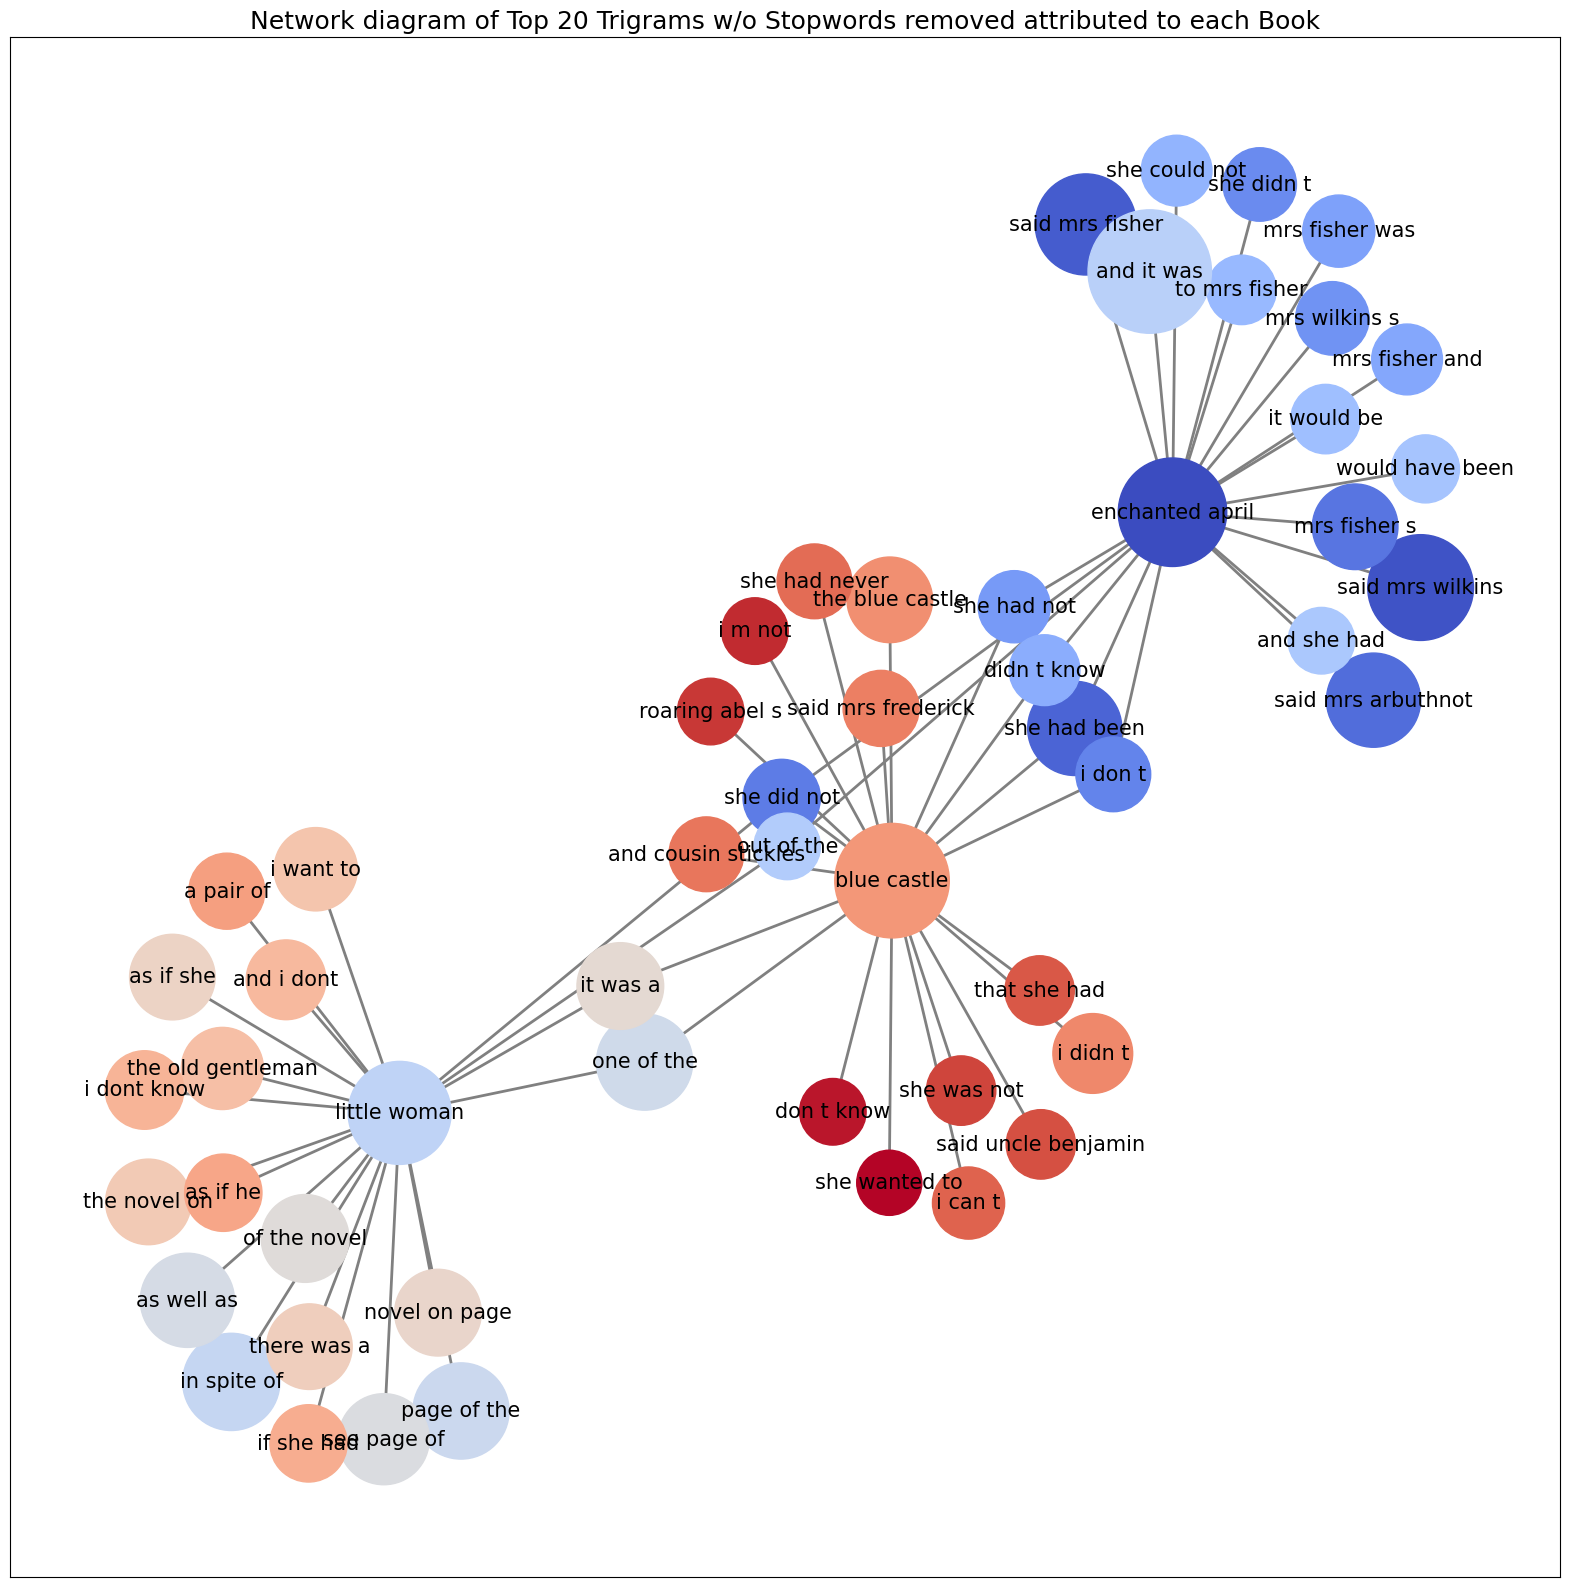

In [44]:
plt.figure(figsize=(20, 20))
cmap = plt.cm.coolwarm
colors = [n for n in range(len(g.nodes()))]
#k = 0.0319
k = 0.14
pos = nx.spring_layout(g, k)
len(g), len(pos), len(trigram_df['counts'][:-6])
nx.draw_networkx(g, pos, node_size=trigram_df['counts'][:-6].values*100, cmap = cmap, 
                  node_color=colors, edge_color='grey', font_size=15, width=2, alpha=1)
plt.title("Network diagram of Top 20 Trigrams w/o Stopwords removed attributed to each Book",
         fontsize=18)
plt.show()

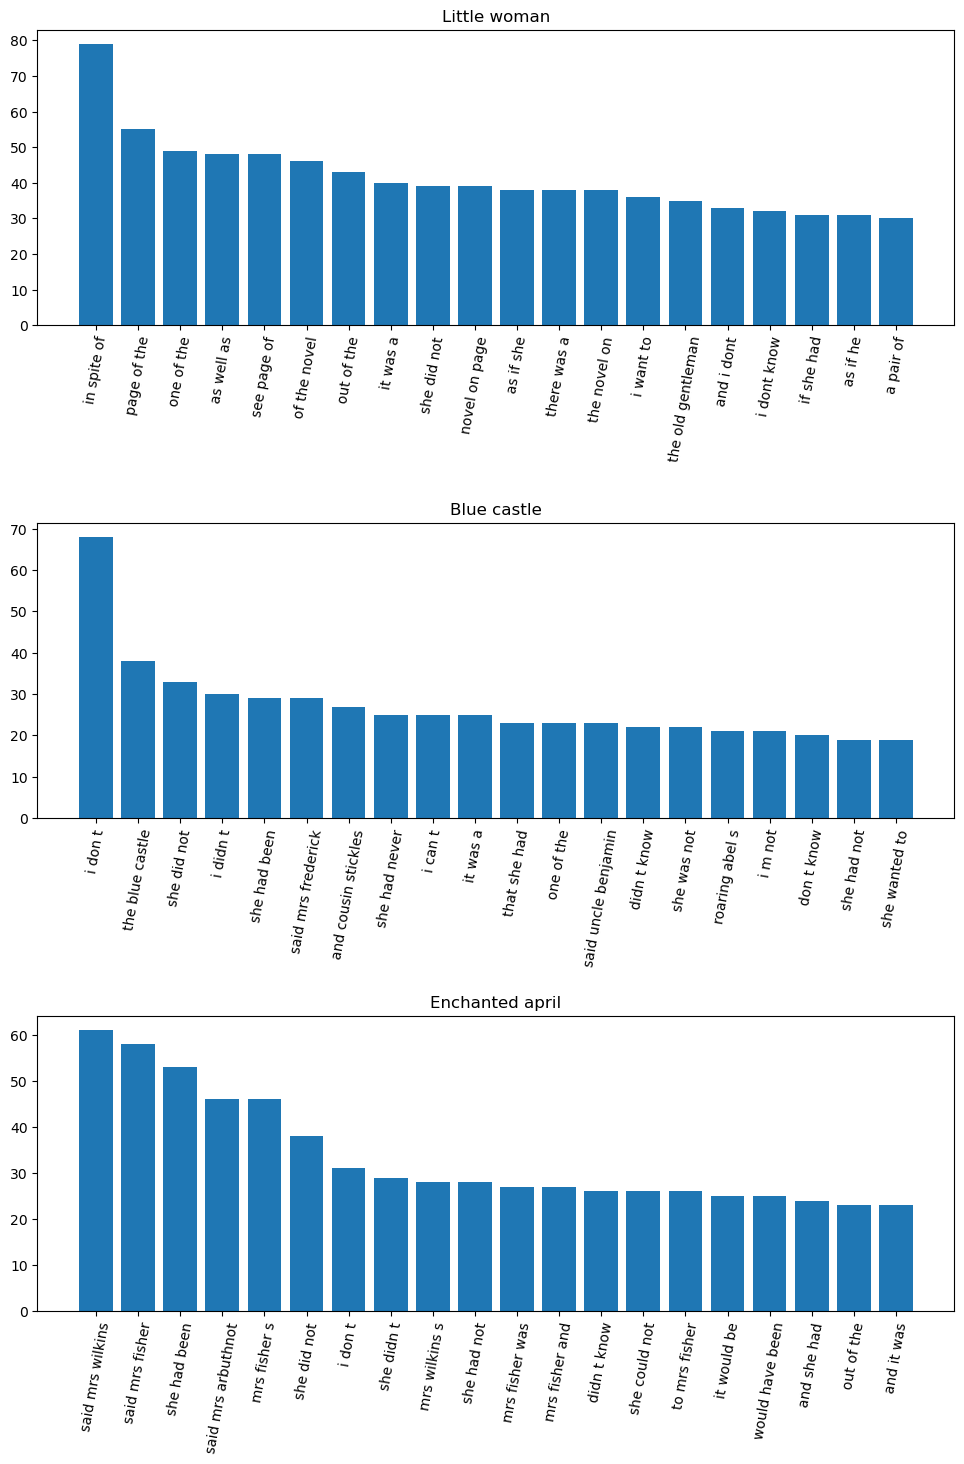

In [45]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(3, 1, figsize = (10, 15))
  
axis[0].bar(trigram_little_woman_keys, trigram_little_woman_values)
axis[0].set_title("Little woman")
axis[0].tick_params(axis='x', labelrotation=80)

axis[1].bar(trigram_blue_castle_keys, trigram_blue_castle_values)
axis[1].set_title("Blue castle")
axis[1].tick_params(axis='x', labelrotation=80)

axis[2].bar(trigram_enchanted_april_keys, trigram_enchanted_april_values)
axis[2].set_title("Enchanted april")
axis[2].tick_params(axis='x', labelrotation=80)
# using padding
figure.tight_layout(pad=2.0)
# Combine all the operations and display
plt.show()

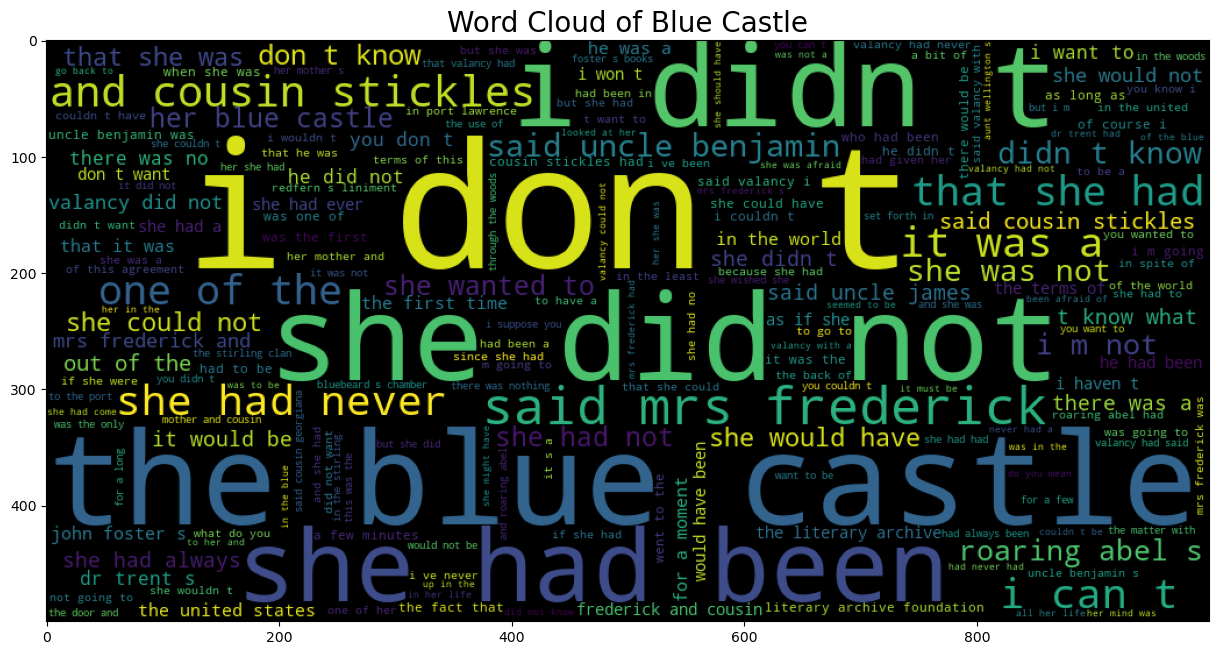

In [71]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud_blue_castle = WordCloud(width = 1000, height = 500).generate_from_frequencies(sorted_trigram_blue_castle_counts_conv)

plt.figure(figsize=(15,8))
plt.title("Word Cloud of Blue Castle", size=20)
plt.imshow(wordcloud)

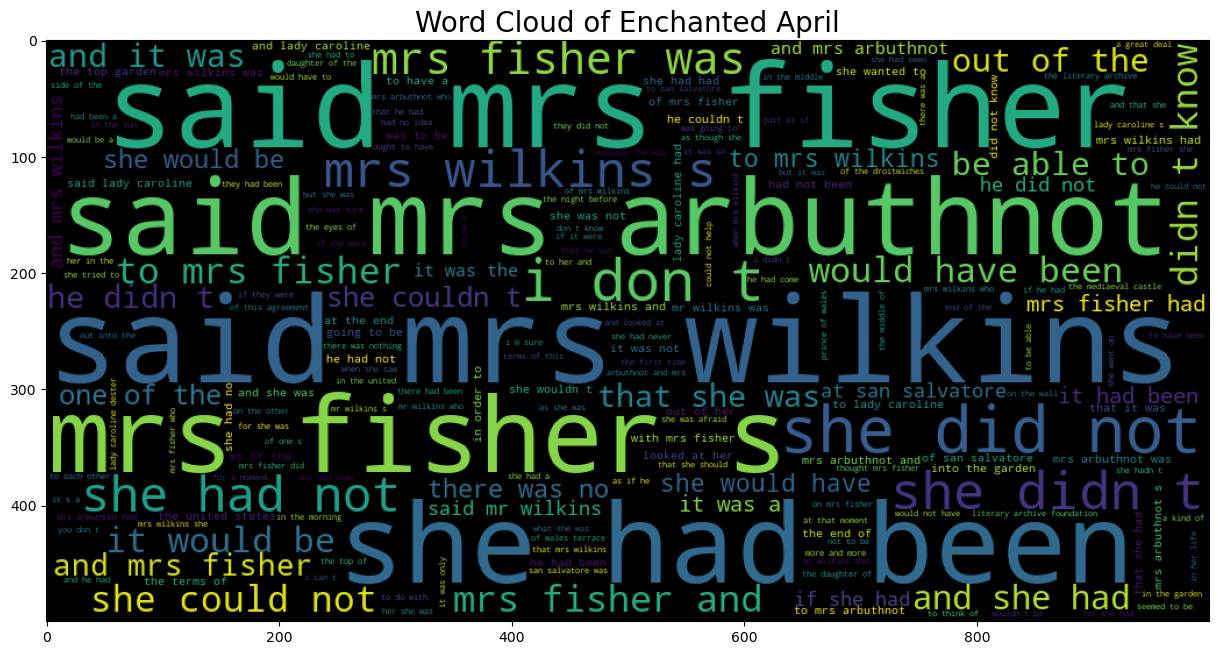

In [73]:
wordcloud_enchanted_april = WordCloud(width = 1000, height = 500).generate_from_frequencies(sorted_trigram_enchanted_april_counts_conv)

plt.figure(figsize=(15,8))
plt.title("Word Cloud of Enchanted April", size=20)
plt.imshow(wordcloud_enchanted_april)

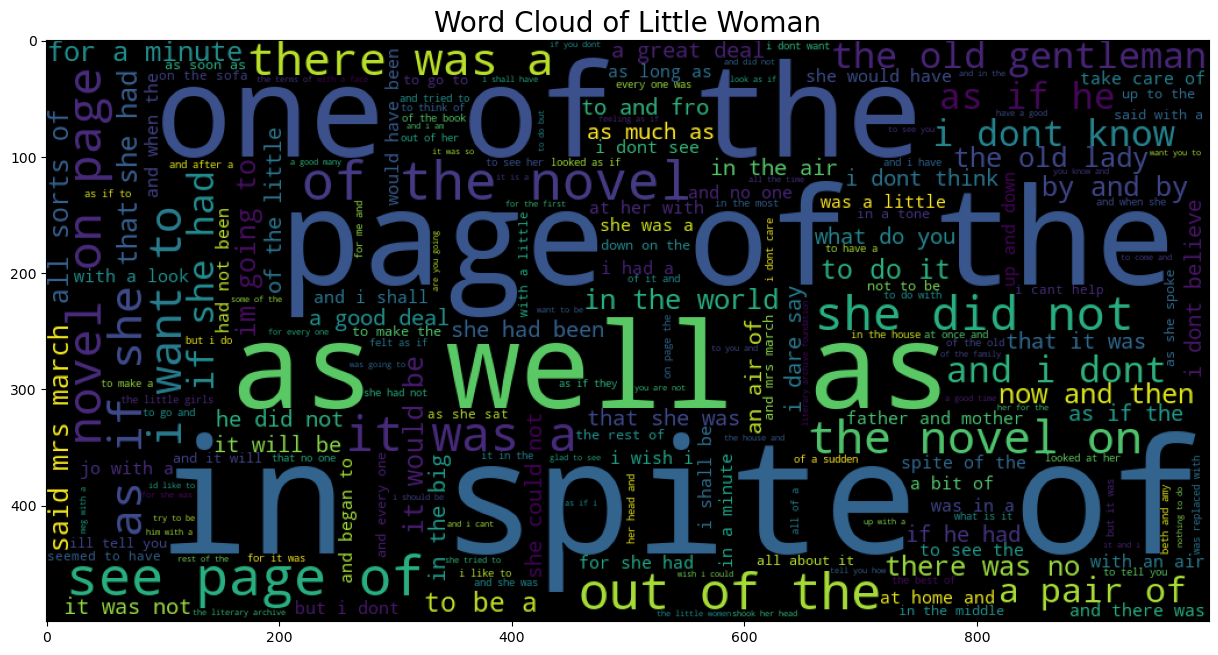

In [74]:
wordcloud_little_woman = WordCloud(width = 1000, height = 500).generate_from_frequencies(sorted_trigram_little_woman_counts_conv)

plt.figure(figsize=(15,8))
plt.title("Word Cloud of Little Woman", size=20)
plt.imshow(wordcloud_little_woman)